In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [3]:
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', None)

In [4]:
df =pd.read_excel("Fidlatica 6.0_Datasets - QBE.xlsx",header = 1)

In [5]:
df_copy=df.copy()

In [6]:
df.drop(['Stage_Tracker','Stage'],axis =1,inplace =True)


In [7]:
df.drop(df.columns[[0,1,2,3,4]],axis =1,inplace = True)

In [8]:
df.drop(['Inception_Renewal_Date'],axis =1,inplace =True)

In [9]:
df_train = df[df['Train.Test']==1]
df_test = df[df['Train.Test']==0]

In [10]:
df_test.drop(['Train.Test'],axis =1,inplace =True)
df_train.drop(['Train.Test'],axis =1,inplace =True)

C:\Users\dell\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [11]:
def p_value(feature,data):
    CrosstabResult=pd.crosstab(index=df[feature],columns=data['Won'])
    ChiSqResult = chi2_contingency(CrosstabResult)
    p = ChiSqResult[1]
    return p
    

In [12]:
cat_variables = df_train.dtypes[df_train.dtypes == "object"].index
cat_variable_chi=[]
for i in cat_variables:
    if p_value(i,df_train)<.05:
        cat_variable_chi.append(i)

In [12]:
#'Won' in cat_variable_chi

In [13]:
#len(cat_variables)-len(cat_variable_chi)

<AxesSubplot:xlabel='Won', ylabel='count'>

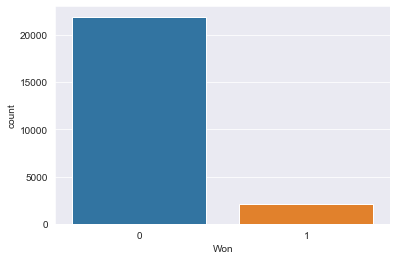

In [270]:
sns.countplot(x='Won', data = df)

In [273]:
cat_variable_chi

['Business_Type',
 'EntCountry',
 'OppCountry',
 'EntDivision',
 'OppDivision',
 'Entity_Hierarchy_Level',
 'Entity_Record_Type',
 'Industry',
 'Line_of_Business',
 'Policy_Type',
 'Primary_Excess',
 'Product',
 'Type',
 'duplicate_opp',
 'Business_Type_bin',
 'MTP_Channel',
 'Gen_Channel',
 'record_type',
 'record_type_stage']

In [13]:
dropped =list(set(cat_variables)-set(cat_variable_chi))
dropped

['diff_country', 'Excluded_Entity']

In [14]:
df_test.drop(dropped,axis =1,inplace =True)
df_train.drop(dropped,axis =1,inplace =True)

In [15]:
#conversion rate
def conversion_rate(data,col):
    z=[]
    for i in data[col].unique():
        z.append((i,float(data[data[col]==i][['Won']].mean())*100))
    return dict(z)

In [16]:
for i in cat_variable_chi:
    mapp = conversion_rate(df_train,i)
    df_train[i] = df_train[i].map(mapp)
    df_test[i] = df_test[i].map(mapp)
    

C:\Users\dell\AppData\Local\Temp/ipykernel_15100/1278478847.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[i] = df_train[i].map(mapp)
C:\Users\dell\AppData\Local\Temp/ipykernel_15100/1278478847.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[i] = df_test[i].map(mapp)


In [17]:
df_train.head()

,Appetite,Business_Type,EntCountry,OppCountry,EntDivision,OppDivision,Entity_Hierarchy_Level,Entity_Record_Type,QBE_Premium_converted_,Industry,Line_of_Business,Policy_Type,Primary_Excess,Product,Type,Won,Nurtured,num_lost_2yrs,gwp_lost_2yrs,num_won_2yrs,percentage_lost_2yrs,gwp_won_2yrs,num_lostnew_2yrs,gwp_lostnew_2yrs,num_wonnew_2yrs,gwp_wonnew_2yrs,num_sub_2yrs,gwp_sub_2yrs,num_quot_2yrs,gwp_quot_2yrs,num_decline_2yrs,gwp_decline_2yrs,num_notbound_2yrs,gwp_notbound_2yrs,num_existing,gwp_existing,num_uniqprod_2yrs,num_existing_uniqprod,num_lostrenew_2yrs,gwp_lostrenew_2yrs,num_wonrenew_2yrs,gwp_wonrenew_2yrs,num_lost_wo_subreceieved_2yrs,num_lost_postsub_2yrs,num_lost_postquot_2yrs,num_open_opp,days_since_last_lost,days_since_last_won,months_since_last_lost,months_since_last_won,broker_num_lost_2yrs,broker_GWP_lost_2yrs,broker_num_won_2yrs,broker_GWP_won_2yrs,broker_percentage_lost_2yrs,broker_days_since_last_lost,broker_days_since_last_won,broker_months_since_last_lost,broker_months_since_last_won,broker_contact_num_lost_2yrs,broker_contact_GWP_lost_2yrs,broker_contact_num_won_2yrs,broker_contact_GWP_won_2yrs,broker_contact_days_since_last_lost,broker_contact_days_since_last_won,broker_contact_months_since_last_lost,broker_contact_months_since_last_won,recurr_lost_num,recurr_lost_flag,nosub_received,sub_not_quot,quot_not_won,Inactivity_r,Appetite_r,Competition_r,Pricing_r,Broker_r,Others_r,duplicate_opp,incept_create_diff,Business_Type_bin,MTP_Channel,Gen_Channel,record_type,Existing_Client,Stage_Tracker_Length,record_type_stage
0,1,9.033957,8.088103,8.128477,9.614261,9.624104,8.893072,18.104449,440680.30,13.392857,13.100724,8.175328,7.519106,10.569106,43.100189,0,1,5,1857744.27,4,55.56,93369.14,5,1857744.27,0,0.0,9,1951113.41,5,93370.52,3,508159.47,1,1.38,0,0.0,3,0,0,0.0,4,93369.14,0,5,1,1,31,365,2,13,23,907141.82,4,80653.11,85.19,1,65,1,3,2,1790263.72,0,0.00,365,730,13,25,2,1,0,2,0,0,0,1,0,0,1,8.875952,534,9.033957,11.004127,12.267251,14.313725,0,4,15.934066
1,1,9.033957,8.088103,8.128477,9.614261,9.624104,17.726397,4.087014,344281.48,7.102672,13.100724,8.175328,7.519106,10.569106,1.444913,0,1,3,0.00,0,100.00,0.00,3,0.00,0,0.0,3,0.00,0,0.00,3,0.00,0,0.00,0,0.0,0,0,0,0.0,0,0.00,0,3,0,0,365,730,13,25,66,551623.01,5,234178.86,92.96,15,12,1,1,9,178739.94,1,103284.45,74,348,3,12,1,1,0,1,0,0,1,0,0,0,0,8.875952,474,9.033957,8.380604,8.380604,14.313725,0,5,12.668744
2,1,9.033957,8.088103,8.128477,9.614261,9.624104,8.893072,18.104449,75741.93,10.901681,7.751938,8.175328,7.519106,6.203881,43.100189,0,1,3,1.38,0,100.00,0.00,2,0.00,0,0.0,3,1.38,0,0.00,3,1.38,0,0.00,0,0.0,0,0,0,0.0,0,0.00,0,3,0,0,294,730,10,25,143,1603607.15,18,334090.92,88.82,1,9,1,1,37,571968.66,1,1032.84,1,236,1,8,1,1,0,1,0,0,0,1,0,0,0,20.391061,452,9.033957,8.380604,8.380604,14.313725,0,5,12.668744
3,1,9.033957,8.088103,8.128477,9.614261,9.624104,8.893072,4.087014,151483.85,9.919571,12.275449,8.175328,7.519106,8.469682,1.444913,0,1,4,317427.53,0,100.00,0.00,4,317427.53,0,0.0,3,317427.53,3,317427.53,0,0.00,3,317427.53,0,0.0,0,0,0,0.0,0,0.00,1,3,3,2,259,730,9,25,355,15830091.24,268,18056991.98,56.98,3,5,1,1,18,1021773.54,49,13745081.86,59,1,2,1,1,1,0,0,1,0,0,0,0,1,0,8.875952,351,9.033957,10.636183,12.267251,14.313725,0,4,15.934066
7,1,9.033957,8.088103,8.128477,9.614261,9.624104,17.726397,4.087014,424154.79,7.222700,12.275449,8.175328,7.519106,8.469682,1.444913,0,1,16,1024003.34,0,100.00,0.00,3,0.00,0,0.0,1,0.00,0,0.00,1,0.00,0,0.00,0,0.0,0,0,0,0.0,0,0.00,15,1,0,0,364,730,13,25,355,15830091.24,268,18056991.98,56.98,3,5,1,1,5,4572058.12,27,3983387.50,153,90,6,3,0,0,0,0,0,1,0,0,0,0,0,8.875952,487,9.033957,10.636183,12.267251,14.313725,0,5,12.668744


In [ ]:
'''STANDARDISATION'''

In [325]:
#Do not include cat_varaible_chi
#Float
#Int 
'''
def funct (a):
    for i in a :
        if  df[i].nunique > 5:
 '''   
len(df_train['Stage_Tracker_Length'].unique()), df_test.shape,df_train.shape

(5, (9703, 86), (14272, 86))

In [348]:
others=[]
for a in df_train.columns:
    if (a not in cat_variable_chi) and (len(df_train[a].unique())) > :
        df_train_std[a] = df_train[a] 
        df_test_std[a] = df_test[a]
    else:
        others.append(a)


In [351]:
others.remove('Stage_Tracker_Length')

In [390]:
len(others), df_test_std.shape , list(df_train_std)

(29,
 (9703, 57),
 ['QBE_Premium_converted_',
  'num_lost_2yrs',
  'gwp_lost_2yrs',
  'num_won_2yrs',
  'percentage_lost_2yrs',
  'gwp_won_2yrs',
  'num_lostnew_2yrs',
  'gwp_lostnew_2yrs',
  'num_wonnew_2yrs',
  'gwp_wonnew_2yrs',
  'num_sub_2yrs',
  'gwp_sub_2yrs',
  'num_quot_2yrs',
  'gwp_quot_2yrs',
  'num_decline_2yrs',
  'gwp_decline_2yrs',
  'num_notbound_2yrs',
  'gwp_notbound_2yrs',
  'num_existing',
  'gwp_existing',
  'num_uniqprod_2yrs',
  'num_existing_uniqprod',
  'num_lostrenew_2yrs',
  'gwp_lostrenew_2yrs',
  'num_wonrenew_2yrs',
  'gwp_wonrenew_2yrs',
  'num_lost_wo_subreceieved_2yrs',
  'num_lost_postsub_2yrs',
  'num_lost_postquot_2yrs',
  'num_open_opp',
  'days_since_last_lost',
  'days_since_last_won',
  'months_since_last_lost',
  'months_since_last_won',
  'broker_num_lost_2yrs',
  'broker_GWP_lost_2yrs',
  'broker_num_won_2yrs',
  'broker_GWP_won_2yrs',
  'broker_percentage_lost_2yrs',
  'broker_days_since_last_lost',
  'broker_days_since_last_won',
  'broker_

In [391]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = pd.DataFrame(sc.fit_transform(df_train_std), columns = list(df_train_std.columns))
X_test_std = pd.DataFrame(sc.transform(df_test_std), columns = list(df_test_std.columns))

In [388]:
for b in others:
    X_train_std[b] = df_train[b]
    X_test_std[b] = df_test[b]

In [392]:
X_test_std.head()

,QBE_Premium_converted_,num_lost_2yrs,gwp_lost_2yrs,num_won_2yrs,percentage_lost_2yrs,gwp_won_2yrs,num_lostnew_2yrs,gwp_lostnew_2yrs,num_wonnew_2yrs,gwp_wonnew_2yrs,num_sub_2yrs,gwp_sub_2yrs,num_quot_2yrs,gwp_quot_2yrs,num_decline_2yrs,gwp_decline_2yrs,num_notbound_2yrs,gwp_notbound_2yrs,num_existing,gwp_existing,num_uniqprod_2yrs,num_existing_uniqprod,num_lostrenew_2yrs,gwp_lostrenew_2yrs,num_wonrenew_2yrs,gwp_wonrenew_2yrs,num_lost_wo_subreceieved_2yrs,num_lost_postsub_2yrs,num_lost_postquot_2yrs,num_open_opp,days_since_last_lost,days_since_last_won,months_since_last_lost,months_since_last_won,broker_num_lost_2yrs,broker_GWP_lost_2yrs,broker_num_won_2yrs,broker_GWP_won_2yrs,broker_percentage_lost_2yrs,broker_days_since_last_lost,broker_days_since_last_won,broker_months_since_last_lost,broker_months_since_last_won,broker_contact_num_lost_2yrs,broker_contact_GWP_lost_2yrs,broker_contact_num_won_2yrs,broker_contact_GWP_won_2yrs,broker_contact_days_since_last_lost,broker_contact_days_since_last_won,broker_contact_months_since_last_lost,broker_contact_months_since_last_won,recurr_lost_num,nosub_received,sub_not_quot,quot_not_won,incept_create_diff,Stage_Tracker_Length
0,4.855487,-0.488343,0.117936,2.721902,-5.169207,21.797258,-0.491288,0.749492,-0.173522,-0.074521,1.027384,1.391093,1.781035,1.401247,-0.675409,-0.180082,0.155965,0.131722,-0.212397,-0.080126,4.270360,-0.269375,-0.094898,-0.034612,4.752466,35.344873,-0.161514,-0.472118,0.091077,1.120219,1.756138,-1.681243,1.749673,-1.647986,-0.473279,-0.332245,-0.228070,0.019410,-0.766300,-0.071462,-0.471772,-0.218542,-0.422330,-0.345295,0.051097,-0.254393,-0.122616,-0.526095,-0.995301,-0.479363,-0.960777,-1.067709,-0.181302,-0.981860,-0.464405,8.924822,2.358491
1,-0.266459,-0.488343,-0.036460,-0.225965,0.343610,-0.108968,-0.491288,-0.146136,-0.173522,-0.074521,-0.666565,-0.038790,-0.403714,-0.031032,-0.675409,-0.180082,-0.464763,-0.024301,-0.212397,-0.080126,-0.312434,-0.269375,-0.094898,-0.034612,-0.166528,-0.095451,0.835946,-0.836810,-0.456229,-0.226289,0.091360,0.358234,0.105596,0.358060,0.200935,0.359383,-0.034729,0.155271,0.200555,-0.097541,0.147676,-0.218542,0.131617,-0.612654,-0.213759,-0.353787,-0.302995,1.810998,1.194228,1.843964,1.194773,-0.290639,3.868050,-0.981860,-0.464405,12.566233,2.358491
2,3.539814,-0.153055,-0.036460,0.265347,-1.800156,0.010221,-0.089358,-0.146136,-0.173522,-0.074521,-0.424573,-0.031853,-0.091607,-0.024083,-0.675409,-0.180082,-0.464763,-0.024301,-0.212397,-0.080126,1.215164,-0.269375,-0.094898,-0.034612,0.653304,0.097375,1.833405,-0.836810,-0.456229,-0.226289,0.086786,0.358234,0.105596,0.358060,0.218252,0.710850,0.162957,0.052746,-0.271124,0.098054,-0.231390,0.178938,-0.283843,-0.462264,0.324972,0.789240,1.691252,0.204549,-0.712983,0.246676,-0.679618,-0.290639,3.868050,-0.981860,-0.464405,11.534924,2.358491
3,-0.167937,-0.488343,-0.036461,0.265347,-2.872361,0.179165,-0.893218,-0.146138,-0.173522,-0.074521,-0.424573,-0.022021,-0.091607,-0.014235,-0.675409,-0.180082,-0.464763,-0.024301,-0.212397,-0.080126,1.215164,-0.269375,-0.094898,-0.034612,0.653304,0.370696,0.835946,-0.836810,-0.456229,-0.226289,1.760712,-1.681243,1.749673,-1.647986,-0.361295,0.078265,-0.084694,0.019917,-1.013888,-0.214898,-0.550359,-0.218542,-0.560816,-0.495684,0.009607,-0.353787,-0.302995,-0.376095,1.194228,-0.334155,1.194773,-1.067709,-0.181302,-0.981860,-0.464405,9.013948,0.191258
4,0.744103,2.193959,0.007722,0.265347,-0.299584,-0.101812,2.724149,0.110155,0.590832,-0.063081,0.301406,-0.033674,-0.091607,-0.030615,-0.675409,-0.180082,-0.464763,-0.024301,-0.212397,-0.080126,1.215164,-0.269375,-0.094898,-0.034612,-0.166528,-0.095451,5.823244,0.257268,-0.456229,-0.226289,-1.170945,-1.178359,-1.264468,-1.146474,-0.547166,-0.410745,-0.308448,-0.233020,0.453874,0.867396,2.334234,0.576419,2.347403,-0.478974,-0.203957,-0.304090,-0.300981,-0.095450,0.331592,-0.188947,0.351297,0.486431,3.868050,0.151795,-0.464405,8.873894,-1.975976


In [18]:
## to run later 
y_train = df_train['Won']
y_test = df_test['Won']
df_test.drop(['Won'],axis =1,inplace =True)
df_train.drop(['Won'],axis =1,inplace =True)

C:\Users\dell\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [19]:
print(df_train.shape)
print(df_test.shape)
print(y_train.shape)
print(y_test.shape)

(14272, 86)
(9703, 86)
(14272,)
(9703,)


In [20]:
df_test.shape

(9703, 86)

In [21]:
y_train.value_counts()

0    12964
1     1308
Name: Won, dtype: int64

In [ ]:
"SMOTEENN"

In [22]:
from sklearn.model_selection import GridSearchCV,cross_validate
from collections import Counter

In [24]:
df_train = df_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
y_train = y_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [25]:
from imblearn.combine import SMOTEENN
smenn = SMOTEENN()
X_train_Smt , Y_train_Smt = smenn.fit_resample(df_train, y_train)

<AxesSubplot:xlabel='Won', ylabel='count'>

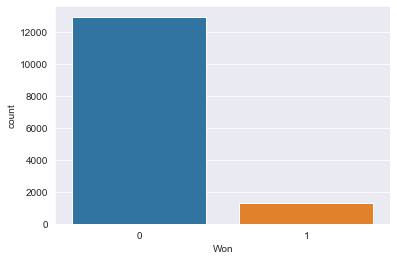

In [276]:
sns.countplot(y_train)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Won', ylabel='count'>

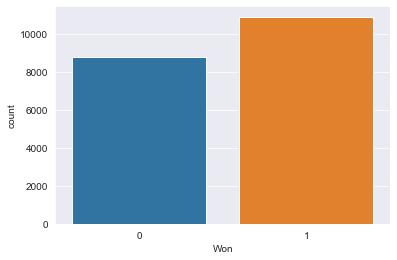

In [273]:
sns.countplot(Y_train_Smt)

In [149]:
"XGBOOST"


'XGBOOST'

In [197]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc , accuracy_score

model=xgb.XGBClassifier(base_score=0.4, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4, gamma=1.5, learning_rate=0.005,
       max_delta_step=0, max_depth=5, min_child_weight=1,
       n_estimators=500, n_jobs=4, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.6)







In [198]:
model.fit(X_train_Smt, Y_train_Smt)
# make predictions for test data    


C:\Users\dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:39:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[04:39:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.4, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=1.5, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.005, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=0, silent=True, subsample=0.6, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [199]:
bin_preds = model.predict(df_test)  ## For Binary Predictions
predictions = model.predict_proba(df_test) ##For Probablity Distribution
# evaluate predictions


In [258]:
new=[]
for i in range(len(predictions)):
    if predictions[i][1] > 0.46:
        new.append(1)
    else:
        new.append(0)

In [259]:
accuracy_score(y_test,new)

0.9238379882510563

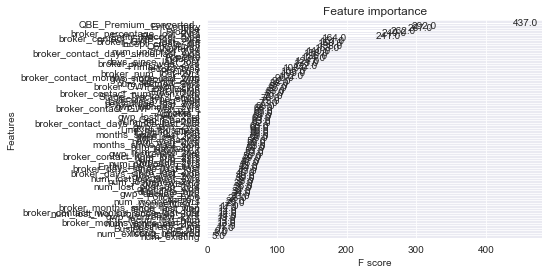

In [33]:
xgb.plot_importance(model)
plt.rcParams['figure.figsize'] = [55, 55]
plt.show()

In [105]:
df_test.head()

,Appetite,Business_Type,EntCountry,OppCountry,EntDivision,OppDivision,Entity_Hierarchy_Level,Entity_Record_Type,QBE_Premium_converted_,Industry,Line_of_Business,Policy_Type,Primary_Excess,Product,Type,Nurtured,num_lost_2yrs,gwp_lost_2yrs,num_won_2yrs,percentage_lost_2yrs,gwp_won_2yrs,num_lostnew_2yrs,gwp_lostnew_2yrs,num_wonnew_2yrs,gwp_wonnew_2yrs,num_sub_2yrs,gwp_sub_2yrs,num_quot_2yrs,gwp_quot_2yrs,num_decline_2yrs,gwp_decline_2yrs,num_notbound_2yrs,gwp_notbound_2yrs,num_existing,gwp_existing,num_uniqprod_2yrs,num_existing_uniqprod,num_lostrenew_2yrs,gwp_lostrenew_2yrs,num_wonrenew_2yrs,gwp_wonrenew_2yrs,num_lost_wo_subreceieved_2yrs,num_lost_postsub_2yrs,num_lost_postquot_2yrs,num_open_opp,days_since_last_lost,days_since_last_won,months_since_last_lost,months_since_last_won,broker_num_lost_2yrs,broker_GWP_lost_2yrs,broker_num_won_2yrs,broker_GWP_won_2yrs,broker_percentage_lost_2yrs,broker_days_since_last_lost,broker_days_since_last_won,broker_months_since_last_lost,broker_months_since_last_won,broker_contact_num_lost_2yrs,broker_contact_GWP_lost_2yrs,broker_contact_num_won_2yrs,broker_contact_GWP_won_2yrs,broker_contact_days_since_last_lost,broker_contact_days_since_last_won,broker_contact_months_since_last_lost,broker_contact_months_since_last_won,recurr_lost_num,recurr_lost_flag,nosub_received,sub_not_quot,quot_not_won,Inactivity_r,Appetite_r,Competition_r,Pricing_r,Broker_r,Others_r,duplicate_opp,incept_create_diff,Business_Type_bin,MTP_Channel,Gen_Channel,record_type,Existing_Client,Stage_Tracker_Length,record_type_stage,Predictions
0,1,16.129032,8.088103,8.128477,9.614261,9.624104,8.893072,18.104449,1152654.41,8.571429,7.751938,8.175328,7.519106,6.203881,43.100189,1,1,722991.12,6,14.29,5948025.12,1,722991.12,0,0.00,7,6671016.24,7,6671016.24,0,0.0,1,722991.12,0,0.0,3,0,0,0.0,6,5948025.12,0,1,1,2,730,365,25,13,79,3845086.14,39,10135278.30,66.95,18,32,1,2,17,2007005.46,2,174039.75,1,32,1,2,0,0,0,0,0,0,0,0,1,0,0,8.875952,755,17.333333,12.473573,12.267251,14.313725,0,5,12.668744,0
1,1,9.033957,8.088103,8.128477,9.614261,9.624104,17.726397,4.087014,0.00,7.222700,7.751938,8.175328,7.519106,6.203881,1.444913,1,1,1.38,0,100.00,0.00,1,1.38,0,0.00,0,0.00,0,0.00,0,0.0,0,0.00,0,0.0,0,0,0,0.0,0,0.00,1,0,0,0,366,730,13,25,663,34784972.19,128,15587564.25,83.82,16,166,1,6,1,137712.59,0,0.00,484,730,17,25,1,1,1,0,0,1,0,0,0,0,0,8.875952,1041,9.033957,15.131579,12.267251,14.313725,0,5,12.668744,0
2,1,9.033957,8.088103,8.128477,9.614261,9.624104,8.893072,18.104449,856572.33,10.901681,7.751938,8.175328,7.519106,6.203881,1.444913,1,2,1.38,1,66.67,32362.46,2,1.38,0,0.00,1,32362.46,1,32362.46,0,0.0,0,0.00,0,0.0,1,0,0,0.0,1,32362.46,2,0,0,0,365,730,13,25,678,50507822.47,219,11473089.28,75.59,31,84,2,3,10,3939958.70,23,1924165.96,152,122,6,5,1,1,1,0,0,1,0,0,0,0,0,8.875952,960,9.033957,15.131579,12.267251,14.313725,0,5,12.668744,0
3,1,9.033957,8.088103,8.128477,9.614261,9.624104,17.726397,18.104449,22171.73,10.901681,7.751938,8.175328,7.519106,6.203881,43.100189,1,1,0.00,1,50.00,78234.50,0,0.00,0,0.00,1,78234.50,1,78234.50,0,0.0,0,0.00,0,0.0,1,0,0,0.0,1,78234.50,1,0,0,0,731,365,25,13,176,22209233.81,105,10155609.72,62.63,7,15,1,1,8,1714178.89,0,0.00,32,730,2,25,0,0,0,0,0,1,0,0,0,0,0,8.875952,762,9.033957,10.636183,12.267251,14.313725,0,3,15.934066,1
4,1,9.033957,5.307856,5.411255,5.450734,5.411255,8.893072,4.087014,227419.17,9.919571,13.100724,8.175328,7.519106,10.569106,1.444913,1,9,206890.81,1,90.00,1942.92,9,206890.81,1,1942.92,4,23866.13,1,1942.92,0,0.0,0,0.00,0,0.0,1,0,0,0.0,0,0.00,6,3,0,0,90,455,3,16,15,333411.67,2,4897.10,88.24,90,639,3,22,9,206890.81,1,1942.92,90,455,3,16,2,1,1,1,0,0,0,0,0,1,0,8.875952,751,9.033957,8.380604,8.380604,14.313725,0,1,15.934066,0


In [ ]:
##Logistic Regression

In [57]:
X_test = df_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
y_train = y_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train_Smt,Y_train_Smt)

#
y_pred=logreg.predict(X_test)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [74]:
# DECISION TREE

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf = clf.fit(X_train_Smt,Y_train_Smt)
DTPred = clf.predict(X_test)


In [119]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,n_estimators=100, oob_score=True)
classifier_rf.fit(X_train_Smt, Y_train_Smt)
RFPreds = classifier_rf.predict_proba(X_test)


In [224]:
new1=[]
for i in range(len(RFPreds)):
    if RFPreds[i][1] > 0.47:
        new1.append(1)
    else:
        new1.append(0)

In [98]:
#KNN 

from sklearn.neighbors import KNeighborsClassifier 
knn= KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train_Smt,Y_train_Smt)
KNNy_pred= knn.predict(X_test)

In [260]:
#Preds =  y_pred                #For Logistic
Preds = new                    #For XGboost Probability
#Preds =  bin_preds             #For XGboost Binary
#Preds = DTPred                 #For DecisionTree
#Preds = new1               #For RandomForest
#Preds = KNNy_pred   #For KNN 

In [59]:
## Confusion Metrix

In [261]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
matrix = confusion_matrix(y_test,Preds, labels=[0,1])
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[8273  683]
 [  56  691]]


In [262]:
tp, fn, fp, tn = confusion_matrix(y_test,Preds,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

Outcome values : 
 691 56 683 8273


In [263]:
matrix1 = classification_report(y_test,Preds,labels=[1,0])
print('Classification report : \n',matrix1)

Classification report : 
               precision    recall  f1-score   support

           1       0.50      0.93      0.65       747
           0       0.99      0.92      0.96      8956

    accuracy                           0.92      9703
   macro avg       0.75      0.92      0.80      9703
weighted avg       0.96      0.92      0.93      9703



In [264]:
sum(Preds)

1374

In [265]:
from sklearn.metrics import roc_curve

In [266]:
fpr1, tpr1, thresh1 = roc_curve(y_test, Preds, pos_label=1)

In [267]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [278]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, Preds)


print('Auc Score:' + str(auc_score1*100))

Auc Score:92.43858716091103


Text(0.5, 257.44, 'Predicted label')

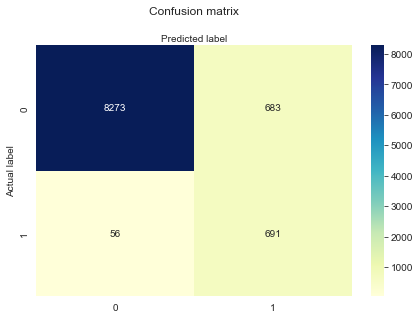

In [269]:
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [69]:
Excel =df_test
Excel.reset_index(drop=True, inplace=True)
Excel['Predictions'] = new

C:\Users\dell\AppData\Local\Temp/ipykernel_15100/3407138407.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Excel['Predictions'] = new


In [70]:
Excel.to_excel('Fidaltica.xlsx', index=False)

In [110]:
del df_test['Predictions']

In [111]:
df_test.shape

(9703, 86)